## Importing the relevant packages


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt


# deprecated
# from statsmodels.tsa.arima_model import ARMA
# use this instead
from statsmodels.tsa.arima.model import ARIMA


from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing


In [45]:
raw_csv_data = pd.read_csv("../data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [46]:
df_comp['market_value'] = df_comp.ftse

In [47]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF


(-0.3, 1.1)

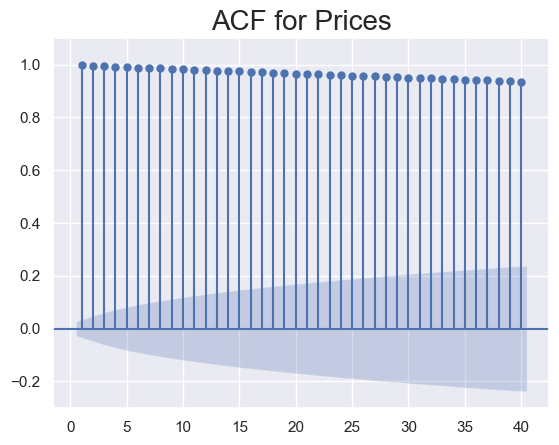

In [48]:
# ACF

sgt.plot_acf(
    df['market_value'],
    zero=False,
    lags=40,
)

plt.title("ACF for Prices", size=20)
plt.ylim(-0.3, 1.1)

## The PACF


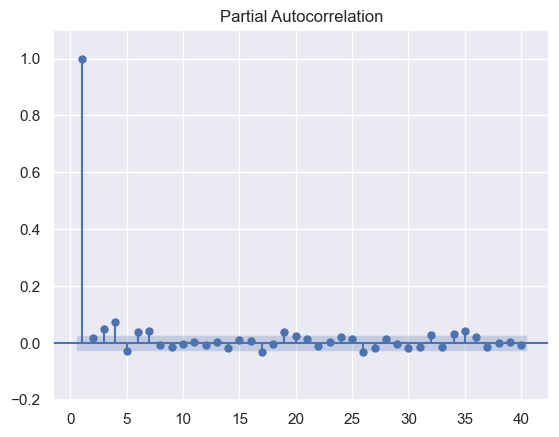

In [49]:
# Pacf

sgt.plot_pacf(
    df['market_value'],
    lags=40,
    alpha=0.05,
    zero=False,
    method=('ols')
)

plt.ylim(-0.2, 1.1)
plt.show()

## The AR(1) Model

order=(p, d, q)

- p= number of lags
- d= skip for arma
- q=0 not taking residual values into consideration


In [50]:
# from statsmodels.tsa.arima.model import ARIMA

model_ar = ARIMA(
    df['market_value'],
    # 1 past values, skip middle, 0 not taking residual values into consideration
    order=(1, 0, 0)
)

In [51]:
results_ar = model_ar.fit()

In [52]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Mon, 05 Feb 2024   AIC                          55251.207
Time:                        20:40:35   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3841     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models


Looking for:

- Non-significant p-test value for the LLR test
- Non-significant p-test value for the highest lag coefficient

If we find both of these, we roll back to one fewer lag.

According to the tutorial, this was found in AR(8), so roll back to model AR(7) even though it may contain some non-significant values.


AR(2) Model


In [53]:
# from statsmodels.tsa.arima.model import ARIMA

model_ar_2 = ARIMA(
    df['market_value'],
    order=(2, 0, 0))

results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Mon, 05 Feb 2024   AIC                          55251.898
Time:                        20:40:35   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Coefficient for ar.L2 not significantly different from zero.

Prices 2 days ago do not significantly affect today's prices


AR(3)


In [54]:
# from statsmodels.tsa.arima.model import ARIMA

model_ar_3 = ARIMA(
    df['market_value'],
    order=(3, 0, 0))

results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Mon, 05 Feb 2024   AIC                          55241.925
Time:                        20:40:36   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AR(4)


In [55]:
model_ar_4 = ARIMA(
    df['market_value'],
    order=(4, 0, 0))

results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Mon, 05 Feb 2024   AIC                          55217.359
Time:                        20:40:36   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.414    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR Test


In [56]:
def llr_test(mod_1, mod_2, df=1, round_return=3):
    l1 = mod_1.fit().llf
    l2 = mod_2.fit().llf

    lr = (2*(l2-l1))
    p = chi2.sf(lr, df).round(round_return)

    return p


def llr_test_fit_models(fit_mod_1, fit_mod_2, df=1, round_return=3):
    l1 = fit_mod_1.llf
    l2 = fit_mod_2.llf

    lr = (2*(l2-l1))

    if round_return:

        p = chi2.sf(lr, df).round(round_return)
    else:
        p = chi2.sf(lr, df)

    return p

## Comparing Higher-Lag AR Models


In [57]:
print(
    llr_test(model_ar_2, model_ar_3),
    llr_test(model_ar_3, model_ar_4),
    sep="\n")
# if it is significant, opt for more complicated model

0.001
0.0


In [58]:
ar = {
    i: ARIMA(
        df['market_value'],
        order=(i, 0, 0)).fit() for i in range(1, 10)}

In [59]:
for i in range(2, 10):
    print(
        f"AR({i})",
        f"llr p-value: {llr_test_fit_models(ar[i-1], ar[i])}")

    print(ar[i].pvalues[-2].round(4))

AR(2) llr p-value: 0.253
0.0803
AR(3) llr p-value: 0.001
0.0
AR(4) llr p-value: 0.0
0.0
AR(5) llr p-value: 0.035
0.0009
AR(6) llr p-value: 0.005
0.0
AR(7) llr p-value: 0.003
0.0
AR(8) llr p-value: 0.562
0.4149
AR(9) llr p-value: 0.284
0.1433


In [60]:
display(ar[7].summary(),
        ar[8].summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Mon, 05 Feb 2024   AIC                          55202.044
Time:                        20:40:44   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.111    5884.171
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.029      -0.058      -0.003
ar.L3         -0.0267      0.013     -2.108      0.035      -0.052      -0.002
ar.L4          0.1039      0.013      8.053      0.000       0.079       0.129
ar.L5         -0.0668      0.012     -5.480      0.000      -0.091      -0.043
ar.L6         -0.0025      0.013     -0.199      0.842      -0.028       0.022
ar.L7          0.0427      0.010      4.397      0.000       0.024       0.062
sigma2      3471.0296     42.068     82.510      0.000    3388.578    3553.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3013.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Mon, 05 Feb 2024   AIC                          55203.708
Time:                        20:40:44   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.243     12.498      0.000    4291.459    5887.822
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.029      -0.058      -0.003
ar.L3         -0.0273      0.013     -2.121      0.034      -0.053      -0.002
ar.L4          0.1047      0.013      7.984      0.000       0.079       0.130
ar.L5         -0.0670      0.012     -5.497      0.000      -0.091      -0.043
ar.L6         -0.0028      0.013     -0.216      0.829      -0.028       0.022
ar.L7          0.0505      0.014      3.598      0.000       0.023       0.078
ar.L8         -0.0080      0.010     -0.815      0.415      -0.027       0.011
sigma2      3471.3457     42.181     82.296      0.000    3388.672    3554.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3003.28
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
# check ar(1) vs ar(7) using df=6
# is it better to add 6 more features?

llr_test_fit_models(
    ar[1], ar[7], df=6)

0.0

- ar(8) fails the llr test
- ar(8) does not provide significantly higher log-likelihood
- ar(8) has higher information criteria


AR models stationary process best. It will do poorly on Non-stationary

S&P process look like a random walk.
FTSE?


## DF-Test

dickey fuller


In [62]:
sts.adfuller(df['market_value'])

(-1.9041551418836875,
 0.3301089327702828,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

Results:

- 0.33 > 0.05 significance level.
- cannot conclude stationarity and must assume non-stationary process.

Transform the data set so that it fits the 'stationary' assumptions.


## Using Returns

expresses the % change between the values for two consecutive periods

- positive returns positive percentage
- negative returns, negative percentage

Creating returns out of prices:

$$
\frac{P_t - P_{t-1}}
     {P_{t-1}} \cdot 100


$$


`df['returns'] = df['market_value].pct_change(1)`

1 is the default period

pandas returns the % expressed as real numbers

e.g. `0.02` instead of 2%

if you want to see percentages, multiply the entire series by 100


In [63]:
df['returns'] = df['market_value'].pct_change(1) \
                                  .mul(100)

/var/folders/2z/36_j5ff923s40202c52y0ljm0000gp/T/ipykernel_24139/3514001581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1) \


In [64]:
df['returns']

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5021, dtype: float64

note that there is no value for the first record as there is no prior record to compare it to. It's often the practice to drop this record as most of the built-in functions require a value to work.


In [65]:
df = df.iloc[1:]

In [66]:
df['returns']

date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5020, dtype: float64

### Confirm stationarity

confirm the stationarity of the new `returns` values.

Augmented Dickey-Fuller test


In [67]:
sts.adfuller(df['returns'])

(-12.770265719497207,
 7.798058336039334e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

7.7 \* 10^-24 is well below even the 1% threshold.

This is considered a stationary process.


## ACF & PACF for `returns`


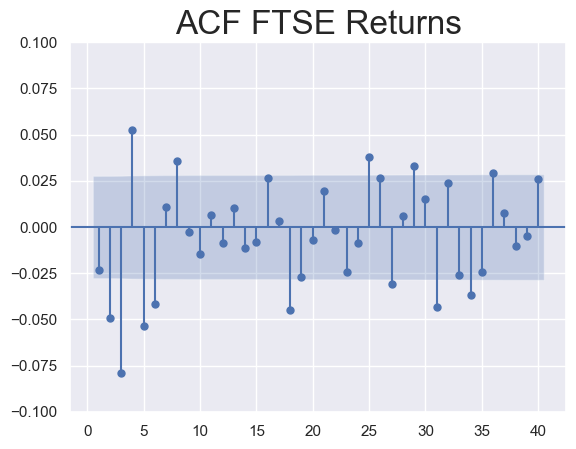

In [70]:
sgt.plot_acf(
    df['returns'],
    lags=40,
    zero=False
)

plt.title("ACF FTSE Returns", size=24)
plt.ylim(-0.1, 0.1)
plt.show()

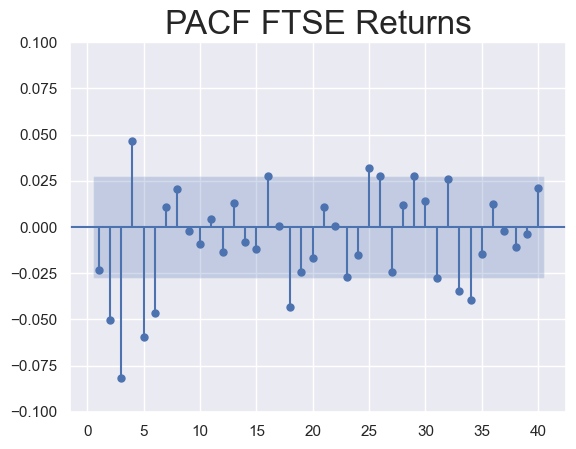

In [74]:
sgt.plot_pacf(
    df['returns'],
    lags=40,
    zero=False,
    method=('ols')
)

plt.title("PACF FTSE Returns", size=24)
plt.ylim(-0.1, 0.1)
plt.show()

## Analyzing the Residuals
